In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# All US labeled papers
path = '/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/filtered_titles_20200922-212948.csv'
us_papers = pd.read_csv(path)
us_papers.shape

(15400, 8)

In [3]:
us_papers.head()

,Unnamed: 0,year,title,authors_string,Countries,Institution,Institution Type,OpenSource
0,0,2017,SnapNETS: Automatic Segmentation of Network Se...,"Sorour E. Amiri, Liangzhe Chen, B. Aditya Prakash",US,"Twitter, Virginia Tech","Academia, Company",NotOpenSource
1,1,2017,Taming the Matthew Effect in Online Markets wi...,"Franco Berbeglia, Pascal Van Hentenryck",US,"Carnegie Mellon, University of Michigan",Academia,NotOpenSource
2,2,2017,A Leukocyte Detection Technique in Blood Smear...,"Deblina Bhattacharjee, Anand Paul",South Korea,Kyungpook National University,Academia,NotOpenSource
3,3,2017,Partitioned Sampling of Public Opinions Based ...,"Weiran Huang, Liang Li, Wei Chen","China, US","Microsoft, Ant Financial, Tsinghua University","Academia, Company",NotOpenSource
4,4,2017,Novel Geometric Approach for Global Alignment ...,"Yangwei Liu, Hu Ding, Danyang Chen, Jinhui Xu",US,"SUNY Buffalo, Michigan State University",Academia,NotOpenSource


In [4]:
country_count = {}
for row in us_papers.iterrows():
    country_rows = row[1]['Countries']
    if isinstance(country_rows, str):
        for country in country_rows.split(','):
            country = country.strip()
            if country not in country_count:
                country_count[country] = 1
            else:
                country_count[country] += 1
            
print(country_count)

{'US': 9015, 'South Korea': 334, 'China': 3391, 'UK': 1249, 'Hong Kong': 528, 'Germany': 719, 'Singapore': 588, 'Japan': 542, 'France': 644, 'Australia': 781, 'Netherlands': 171, 'Canada': 997, 'Iran': 10, 'Israel': 462, 'Italy': 213, 'Finland': 78, 'Greece': 26, 'Austria': 186, 'Poland': 39, 'Czechia': 53, 'New Zealand': 4, 'Denmark': 74, 'India': 210, 'Switzerland': 319, 'Belgium': 110, 'Lebanon': 4, 'Sweden': 78, 'Taiwan': 60, 'Portugal': 24, 'Spain': 24, 'Ireland': 12, 'Russia': 74, 'Turkey': 7, 'Luxembourg': 18, 'Chile': 6, 'Norway': 8, 'Qatar': 15, 'UAE': 13, 'Uruguay': 4, 'Colombia': 1, 'Brazil': 2}


From above, we see that of the 5721 US academic papers, China collaborates on 507 of them compared to other countries.

In [5]:
us_count = country_count['US']
country_count = {k: (v / us_count)*100 for k, v in country_count.items()}
country_count = {k:v for k,v in sorted(country_count.items(), key=lambda item: item[1],reverse=True)}
print(country_count)

{'US': 100.0, 'China': 37.61508596783139, 'UK': 13.854686633388797, 'Canada': 11.05934553521908, 'Australia': 8.663338879645035, 'Germany': 7.975596228508042, 'France': 7.143649473100389, 'Singapore': 6.522462562396007, 'Japan': 6.012201885745979, 'Hong Kong': 5.856905158069884, 'Israel': 5.124792013311148, 'South Korea': 3.7049362174154186, 'Switzerland': 3.538546866333888, 'Italy': 2.3627287853577372, 'India': 2.329450915141431, 'Austria': 2.0632279534109816, 'Netherlands': 1.896838602329451, 'Belgium': 1.2201885745978924, 'Finland': 0.8652246256239602, 'Sweden': 0.8652246256239602, 'Denmark': 0.8208541320022186, 'Russia': 0.8208541320022186, 'Taiwan': 0.6655574043261231, 'Czechia': 0.5879090404880754, 'Poland': 0.4326123128119801, 'Greece': 0.28840820854132004, 'Portugal': 0.26622296173044924, 'Spain': 0.26622296173044924, 'Luxembourg': 0.19966722129783696, 'Qatar': 0.16638935108153077, 'UAE': 0.14420410427066002, 'Ireland': 0.13311148086522462, 'Iran': 0.11092623405435387, 'Norway'

The US collaborated with China on 8.86% of its papers from the years 2013-2019.

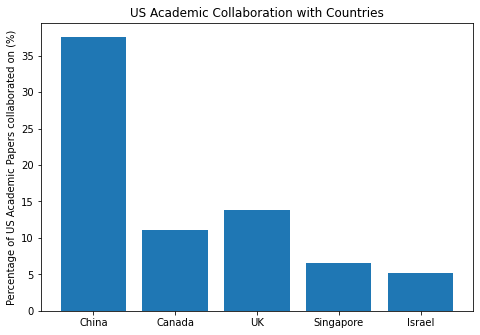

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

countries = ['China', 'Canada', 'UK', 'Singapore', 'Israel']
pcts = [country_count['China'], country_count['Canada'], country_count['UK'], country_count['Singapore'], country_count['Israel']]
ax.bar(countries, pcts)
plt.ylabel("Percentage of US Academic Papers collaborated on (%)")
plt.title("US Academic Collaboration with Countries")
plt.show()

In [85]:
us_papers['Countries'].fillna('UnknownCountry')
us_papers.head()
us_df = us_papers[us_papers['Countries'].str.contains('US', na=False)]
us_df.head()

,Unnamed: 0,year,title,authors_string,Countries,Institution,Institution Type
0,0,2017,SnapNETS: Automatic Segmentation of Network Se...,"Sorour E. Amiri, Liangzhe Chen, B. Aditya Prakash",US,"Virginia Tech, Twitter","Academia, Company"
1,1,2017,Taming the Matthew Effect in Online Markets wi...,"Franco Berbeglia, Pascal Van Hentenryck",US,"Carnegie Mellon, University of Michigan",Academia
3,3,2017,Partitioned Sampling of Public Opinions Based ...,"Weiran Huang, Liang Li, Wei Chen","China, US","Ant Financial, Microsoft, Tsinghua University","Academia, Company"
4,4,2017,Novel Geometric Approach for Global Alignment ...,"Yangwei Liu, Hu Ding, Danyang Chen, Jinhui Xu",US,"SUNY Buffalo, Michigan State University",Academia
6,6,2017,Profit-Driven Team Grouping in Social Networks,Shaojie Tang,US,UT Dallas,Academia


In [95]:
collab_dict = {}

for row in us_papers.iterrows():
    country_rows = row[1]['Countries']
    if isinstance(country_rows, str):
        countries = country_rows.split(',')
        collab_num = len(countries)
        if collab_num in collab_dict:
            collab_dict[collab_num] += 1
        else:
            collab_dict[collab_num] = 1
    else:
        if '0' in collab_dict:
            collab_dict['0'] += 1
        else:
            collab_dict['0'] = 1
            
print(collab_dict)

{1: 14798, 2: 4342, 3: 613, 4: 66, 6: 3, 5: 2, '0': 37}


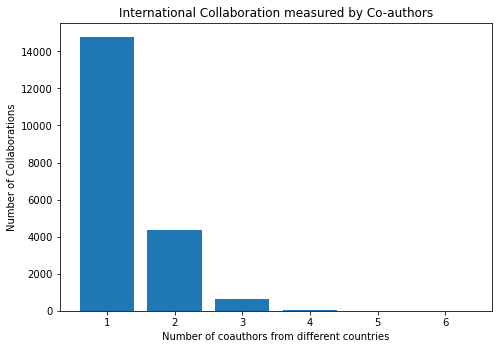

In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

country_collabs = ['1', '2', '3', '4', '5' ,'6']
collab_amt = [collab_dict[1], collab_dict[2], collab_dict[3], collab_dict[4], collab_dict[5], collab_dict[6]]
ax.bar(country_collabs, collab_amt)
plt.ylabel("Number of Collaborations")
plt.xlabel("Number of coauthors from different countries")
plt.title("International Collaboration measured by Co-authors")
plt.show()

In [ ]:
G = nx.Graph()

In [3]:
comp_path = '/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/filtered_titles_20200916-114613.csv'
us_china_papers = pd.read_csv(comp_path)
us_china_papers.shape

(12302, 8)

In [4]:
us_china_papers.head()

,Unnamed: 0,year,title,authors_string,Countries,Institution,Institution Type,OpenSource
0,0,2017,SnapNETS: Automatic Segmentation of Network Se...,"Sorour E. Amiri, Liangzhe Chen, B. Aditya Prakash",US,"Virginia Tech, Twitter","Academia, Company",NotOpenSource
1,1,2017,Taming the Matthew Effect in Online Markets wi...,"Franco Berbeglia, Pascal Van Hentenryck",US,"Carnegie Mellon, University of Michigan",Academia,NotOpenSource
2,3,2017,Partitioned Sampling of Public Opinions Based ...,"Weiran Huang, Liang Li, Wei Chen","China, US","Ant Financial, Microsoft, Tsinghua University","Academia, Company",NotOpenSource
3,4,2017,Novel Geometric Approach for Global Alignment ...,"Yangwei Liu, Hu Ding, Danyang Chen, Jinhui Xu",US,"Michigan State University, SUNY Buffalo",Academia,NotOpenSource
4,5,2017,Towards Better Understanding the Clothing Fash...,"Yihui Ma, Jia Jia, Suping Zhou, Jingtian Fu, Y...",China,Beijing University of Posts and Telecommunicat...,Academia,NotOpenSource


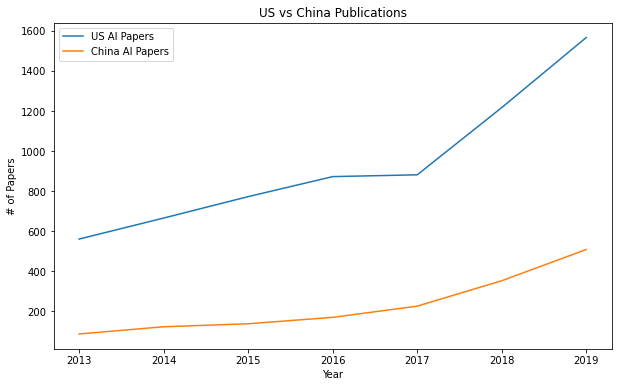

In [15]:
year_range = range(2013, 2020)
us_df = us_china_papers[us_china_papers['Countries'] == 'US']
us_yearly = []
for year in year_range:
    us_yearly.append(us_df[us_df['year'] == year].shape[0])

china_df = us_china_papers[us_china_papers['Countries'] == 'China']
china_yearly = []
for year in year_range:
    china_yearly.append(china_df[china_df['year'] == year].shape[0])
    
plt.figure(figsize=(10,6))
plt.title("US vs China Publications")
plt.xlabel("Year")
plt.ylabel("# of Papers")
plt.plot(year_range, us_yearly, label='US AI Papers')
plt.plot(year_range, china_yearly, label='China AI Papers')
plt.legend()
plt.show()


In [16]:
us_df.shape

(6534, 8)

In [25]:
types_dict = {}
for row in us_df.iterrows():
    inst_type = row[1]['Institution Type']
    if isinstance(inst_type, str):
        if inst_type in types_dict:
            types_dict[inst_type] += 1
        else:
            types_dict[inst_type] = 1

sorted_types_dict = {k: v for k, v in sorted(types_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_types_dict)

{'Academia': 4394, 'Academia, Company': 1093, 'Company': 832, 'Academia, Independent Research': 94, 'Academia, Government': 38, 'Independent Research': 30, 'Government': 25, 'Academia, Company, Independent Research': 11, 'Company, Independent Research': 8, 'Company, Government': 5, 'Academia, Company, Government': 3, 'Academia, Government, Independent Research': 1}


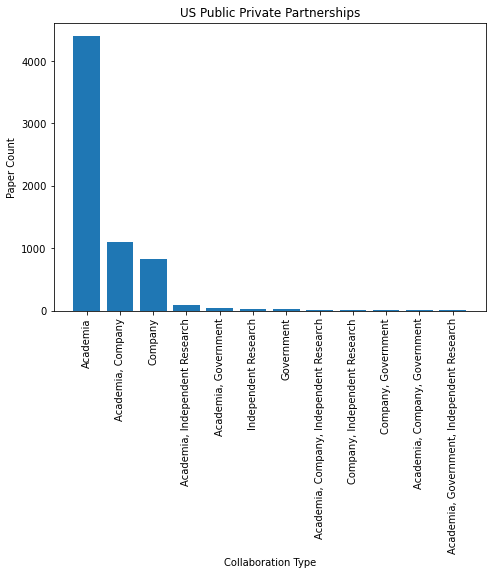

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
keys = sorted_types_dict.keys()
values = sorted_types_dict.values()

plt.title("US Public Private Partnerships")
plt.xlabel("Collaboration Type")
plt.ylabel("Paper Count")
plt.bar(keys, values)
plt.xticks(rotation = 90)
plt.show()